# Module 5

## Dataset Version Control with DVC

### Step 1
Install DVC python libary in local machine:
```pip install dvc```

In [ ]:
! pip install dvc
! pip install dvc_gdrive

### Step 2: Initialize Git and DVC in Your Development Environment and Working Directory

1. **Navigate to Your Project Directory**:
   Open your terminal and navigate to the directory where your project is located or where you want to create your project.

   ```sh
   cd /path/to/your/project
   ```

2. **Initialize a Git Repository**:
   Initialize a new Git repository in your project directory. This will enable version control for your project files.
   
   ```sh
   git init
   ```
3. **Initialize a DVC Repository**:
   Initialize a new DVC repository in the same directory. 
   This will set up DVC configuration files and directories for managing your data and models.
   ```sh
   dvc init
   ```

### Step 3: Install Required Libraries

Install the necessary Python libraries for your project, including PyTorch, Torchvision, Torchaudio, NumPy, and Matplotlib.

```sh
pip install torch torchvision torchaudio numpy matplotlib
```

What This Command Does:
- torch: Installs PyTorch, an open-source machine learning library.
- torchvision: Installs Torchvision, a library for computer vision.
- torchaudio: Installs Torchaudio, a library for audio processing.
- numpy: Installs NumPy, a library for numerical computations.
- matplotlib: Installs Matplotlib, a library for creating visualizations.

In [ ]:
pip install torch torchvision torchaudio numpy matplotlib

In [5]:
import torch
import torchvision
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
from torch.utils.data import random_split, DataLoader
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
import numpy as np
import os



### Step 4: Download and Prepare the FashionMNIST Dataset

Download the FashionMNIST dataset and prepare it for training and testing.
Also, Define the class names for the FashionMNIST dataset.

In [6]:
# Download and prepare the FashionMNIST dataset
fashion_mnist_training = datasets.FashionMNIST(
    root="data/FashionMNIST",
    train=True,
    download=True,
    transform=ToTensor(),
)

fashion_mnist_test = datasets.FashionMNIST(
    root="data/FashionMNIST",
    train=False,
    download=True,
    transform=ToTensor(),
)

100%|██████████| 26421880/26421880 [00:05<00:00, 5243386.54it/s]


Extracting data/FashionMNIST/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 1913574.61it/s]


Extracting data/FashionMNIST/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5056228.08it/s]


Extracting data/FashionMNIST/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 3110830.86it/s]

Extracting data/FashionMNIST/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/FashionMNIST/raw



In [7]:
# FashionMNIST class names
classes = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
           "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

### Step 5: Create Utility Functions

- imshow: To display images
- split_datadet: To partition dataset into training and validation set using a specified training partition ratio

In [8]:
# Define a function to show images
def imshow(img):
    # Convert the tensor image to numpy for displaying
    img = img.numpy()
    # The images are in Channel x Height x Width format. Convert them to Height x Width x Channel format.
    plt.imshow(np.transpose(img, (1, 2, 0)))
    plt.show()

In [9]:
def split_dataset(dataset, train_ratio=0.8):
    train_size = int(train_ratio * len(dataset))
    validation_size = len(dataset) - train_size
    return random_split(dataset, [train_size, validation_size])

### Step 6: Create and Save Two Different Versions of the Dataset Splits

Create and prepare two different versions of the dataset splits for training, validation, and testing.

- train_dataset_v1, validation_dataset_v1: Creates the training and validation splits for Version 1 with an 80/20 ratio.
- train_dataset_v2, validation_dataset_v2: Creates the training and validation splits for Version 2 with a 70/30 ratio

Save the created dataset splits to separate directories for each version.

In [10]:
# Create two different versions of the dataset splits

# Version 1 splits
train_dataset_v1, validation_dataset_v1 = split_dataset(fashion_mnist_training, train_ratio=0.8)
test_dataset_v1 = fashion_mnist_test

# Version 2 splits (different train/validation ratio for demonstration)
train_dataset_v2, validation_dataset_v2 = split_dataset(fashion_mnist_training, train_ratio=0.7)
test_dataset_v2 = fashion_mnist_test

Note:
* In the PyTorch framework, the .pt file extension is used to represent serialized objects, such as trained models and datasets. 
* The .pt suffix is an abbreviation for "PyTorch," and it is used when saving and loading objects using the `torch.save` and `torch.load` functions. 
* These functions convert the objects into a binary format, allowing for efficient storage on disk. 
* The serialized objects can be seamlessly loaded back into a PyTorch environment for further processing or utilization.

In [11]:
# Save the splits
os.makedirs('data/version1', exist_ok=True)
torch.save(train_dataset_v1, 'data/version1/train.pt')
torch.save(validation_dataset_v1, 'data/version1/validation.pt')
torch.save(test_dataset_v1, 'data/version1/test.pt')

os.makedirs('data/version2', exist_ok=True)
torch.save(train_dataset_v2, 'data/version2/train.pt')
torch.save(validation_dataset_v2, 'data/version2/validation.pt')
torch.save(test_dataset_v2, 'data/version2/test.pt')

### Step 7: Visualize content of each dataset version

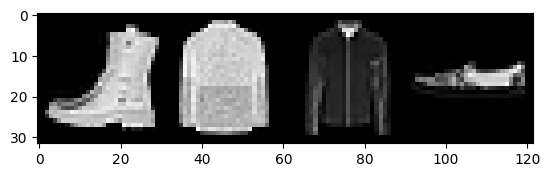

Labels:  Ankle boot Pullover  Coat Sneaker


In [12]:
# Show images from the training set of version 1
train_loader_v1 = DataLoader(train_dataset_v1, batch_size=4, shuffle=True)
images, labels = next(iter(train_loader_v1))

# Show images
imshow(torchvision.utils.make_grid(images))

# Print labels
print('Labels: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

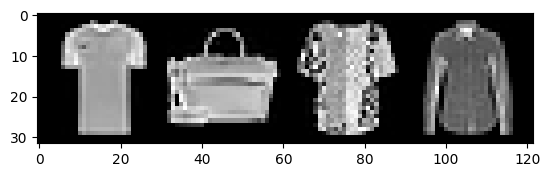

Labels:  T-shirt/top   Bag Shirt Shirt


In [13]:
# Show images from the training set of version 2
train_loader_v2 = DataLoader(train_dataset_v2, batch_size=4, shuffle=True)
images, labels = next(iter(train_loader_v2))

# Show images
imshow(torchvision.utils.make_grid(images))

# Print labels
print('Labels: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

### Step 8: Add the Datasets to DVC and Configure Remote Storage

Add the saved dataset splits to DVC and configure a remote storage location.

```sh
# Add the datasets to DVC
!dvc add data/version1
!dvc add data/version2

# Add to remote location
dvc remote add -d default gdrive://example_location

### Step 9: Load and Visualize a Dataset Split

Load the saved dataset splits using PyTorch and visualize the images along with their labels.


In [ ]:
# Example for PyTorch
train_dataset = torch.load('data/version1/train.pt')
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
images, labels = next(iter(train_loader))

# Show images
imshow(torchvision.utils.make_grid(images))

# Print labels
print('Labels: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))